In [8]:
cd /home/dongdong/SCR/trpcage.run07

/scratch/gpfs/dongdong/trpcage.run07


In [13]:
cd /home/dongdong/SCR/trpcage.run6cv/iter.000011/00.enhcMD/003

/scratch/gpfs/dongdong/trpcage.run6cv/iter.000011/00.enhcMD/003


In [ ]:
gmx trjconv -s ../../../topol.tpr -f traj_comp.xtc -o md_nopbc.xtc -pbc mol -ur compact
gmx rms -s ../../../conf_nosol.gro -f traj_comp.xtc -o rmsd.xvg
os.system("sed -i 's/^@/#/g' %s " %filename)

In [8]:
import os
for it in range(20,21):
    for en in range(30):
        #print(en)
        trjdir='/scratch/gpfs/dongdong/trpcage.run05/iter.%06d/00.enhcMD/%03d/' %(it,en)
        
        trjname=trjdir+'traj_comp.xtc'
        outtrj=trjdir+'md_nopbc.xtc'
        outrmsd=trjdir+'rmsd.xvg'
        #print(trjname)
        os.system('echo -e "1\n" | gmx trjconv -s topol.tpr -f %s -o %s -pbc mol -ur compact' %(trjname, outtrj))
        os.system('echo -e "3\n3\n" | gmx rms -s conf_nosol.gro -f %s -o %s' %(outtrj, outrmsd))

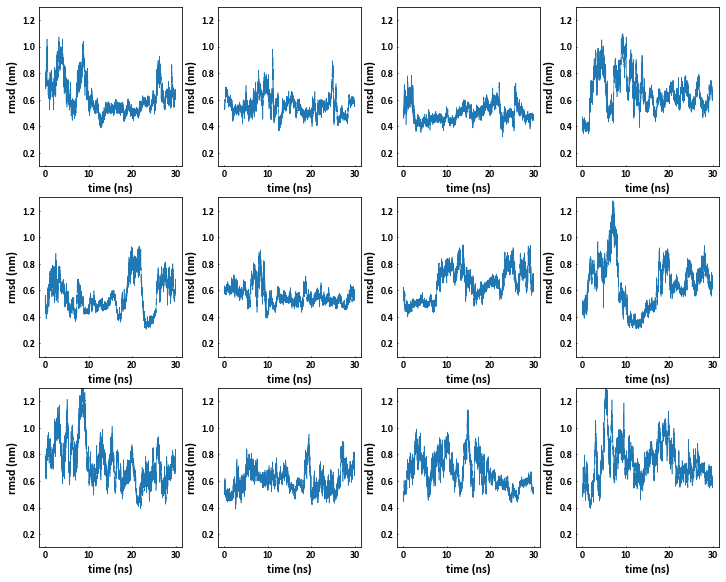

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=12)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
fig = plt.figure(figsize=(10,8))
num_walkers=12
for en in range(num_walkers):
    allrmsd=[]
    for it in range(15):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.chdir(dirname)
        filename='rmsd.xvg'
        os.system("sed -i 's/^@/#/g' %s " %filename)
        rmsd=np.loadtxt(filename)[:,1]
        os.chdir('/home/dongdong/SCR/trpcage.run06')
        allrmsd.extend(list(rmsd))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/4,4,en+1)
    sub.plot(np.array(range(len(allrmsd)))/1000.0*2,allrmsd,lw=0.6)
    sub.set_ylabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    plt.ylim(0.1,1.3)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

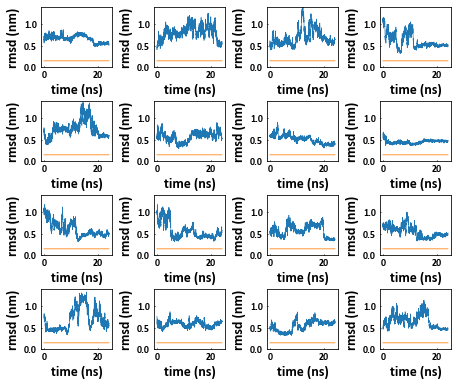

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=14)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
fig = plt.figure(figsize=(7,6))
num_walkers=16
os.chdir('/home/dongdong/SCR/trpcage.run6cv')
for en in range(num_walkers):
    allrmsd=[]
    for it in range(12):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.chdir(dirname)
        filename='rmsd.xvg'
        os.system("sed -i 's/^@/#/g' %s " %filename)
        rmsd=np.loadtxt(filename)[:,1]
        os.chdir('/home/dongdong/SCR/trpcage.run6cv')
        allrmsd.extend(list(rmsd))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/4,4,en+1)
    sub.plot(np.array(range(len(allrmsd)))/1000.0*2,allrmsd,lw=0.6)
    sub.set_ylabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    sub.plot(np.array(range(len(allrmsd)))/1000.0*2,[0.15]*len(allrmsd),lw=0.8)
    sub.tick_params(direction="in", length=1)
    plt.ylim(0.,1.4)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=3, w_pad=0.8, h_pad=0.4)
plt.show()

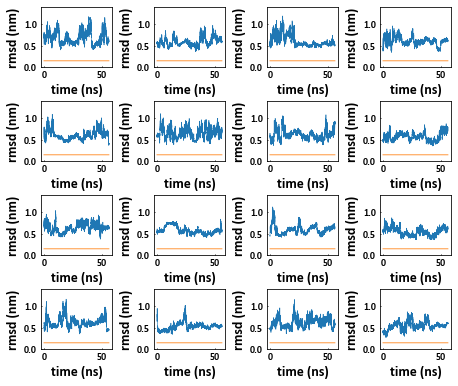

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=14)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
fig = plt.figure(figsize=(7,6))
num_walkers=16
os.chdir('/home/dongdong/SCR/trpcage.run43cv')
for en in range(num_walkers):
    allrmsd=[]
    for it in range(28):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.chdir(dirname)
        filename='rmsd.xvg'
        os.system("sed -i 's/^@/#/g' %s " %filename)
        rmsd=np.loadtxt(filename)[:,1]
        os.chdir('/home/dongdong/SCR/trpcage.run43cv')
        allrmsd.extend(list(rmsd))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/4,4,en+1)
    sub.plot(np.array(range(len(allrmsd)))/1000.0*2,allrmsd,lw=0.6)
    sub.set_ylabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    sub.plot(np.array(range(len(allrmsd)))/1000.0*2,[0.15]*len(allrmsd),lw=0.8)
    sub.tick_params(direction="in", length=1)
    plt.ylim(0.,1.4)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=3, w_pad=0.8, h_pad=0.4)
plt.show()

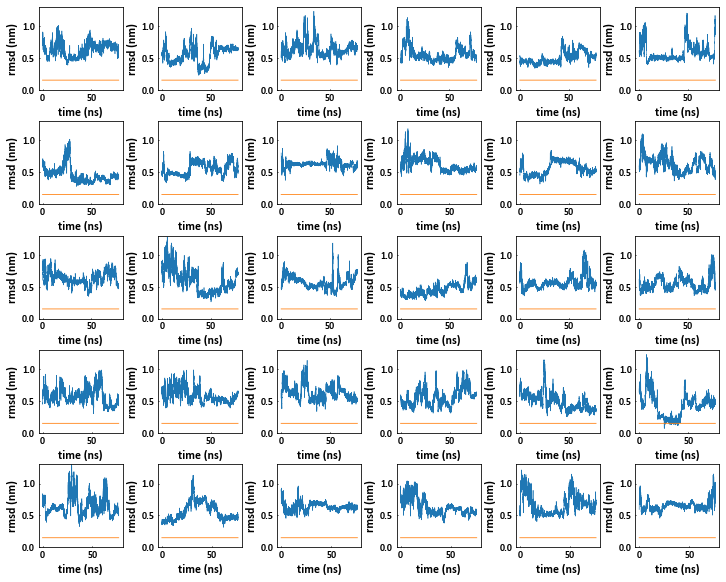

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=12)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
fig = plt.figure(figsize=(10,8))
num_walkers=30
for en in range(30):
    allrmsd=[]
    for it in range(39):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.chdir(dirname)
        #print(dirname)
        filename='rmsd.xvg'
        os.system("sed -i 's/^@/#/g' %s " %filename)
        rmsd=np.loadtxt(filename)[:,1]
        os.chdir('/home/dongdong/SCR/trpcage.run05')
        allrmsd.extend(list(rmsd))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    sub.plot(np.array(range(len(allrmsd)))/1000.0*4,allrmsd,lw=0.6)
    sub.set_ylabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    sub.plot(np.array(range(len(allrmsd)))/1000.0*4,[0.15]*len(allrmsd),lw=0.8)
    sub.tick_params(direction="in", length=1)
    plt.ylim(0.0,1.3)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

In [2]:
#!/usr/bin/env python3

import os,glob,shutil
import argparse
import numpy as np
import sklearn.cluster as cluster

cv_dih_dim = 38

def parse_cmd () :
    parser = argparse.ArgumentParser()
    parser.add_argument("-i","--idx-file", type=str, default = 'sel.out',
                        help="The sel idx files")
    parser.add_argument("-c","--cv-file", type=str, default = 'sel.angle.out',
                        help="The sel cv files")
    parser.add_argument("-t","--threshold", type=int, default = 0.3,
                        help="The number of clusters")
    parser.add_argument("--output-idx", type=str, default = 'cls.out',
                        help="The output cv idx")
    parser.add_argument("--output-cv", type=str, default = 'cls.angle.out',
                        help="The output cv value")
    args = parser.parse_args()
    return args

def cv_dist (a, b) :
    diff = a - b
    angle_pbc_range = len(diff)
    if cv_dih_dim is not None :
        angle_pbc_range = cv_dih_dim
    for ii in range(len(diff)) :
        value = diff[ii]
        if ii < angle_pbc_range :
            if value < -np.pi :
                value += 2 * np.pi
            elif value >= np.pi :
                value -= 2 * np.pi
        diff[ii] = value
    return np.linalg.norm(diff)

def mk_dist (cv) :
    nframe = cv.shape[0]
    dist = np.zeros([nframe, nframe])
    for ii in range(nframe) :
        for jj in range(ii+1, nframe) :
            dist[ii][jj] = cv_dist(cv[ii], cv[jj])
            dist[jj][ii] = dist[ii][jj]
    return dist

def mk_cluster (dist, distance_threshold) :
    cls = cluster.AgglomerativeClustering(n_clusters = None, 
                                          linkage='average', 
                                          affinity = 'precomputed',
                                          distance_threshold=distance_threshold)
    cls.fit(dist)
    return cls.labels_

def sel_from_cluster (angles, distance_threshold) :
    dist = mk_dist (angles)
    labels = mk_cluster (dist, distance_threshold)
    # make cluster map
    cls_map = []
    for ii in range(len(set(labels))) :
        cls_map.append([])
    for ii in range(len(labels)) :
        cls_idx = labels[ii]
        cls_map[cls_idx].append(ii)
    # randomly select from cluster
    cls_sel = []
    np.random.seed(seed = None)
    for ii in cls_map :
        _ret = np.random.choice(ii, 1)
        cls_sel.append (_ret[0])    
    cls_sel.sort()
    return cls_sel

def _main () :
    args = parse_cmd ()
    angidx = np.loadtxt (args.idx_file)
    angles = np.loadtxt (args.cv_file)    
    ncluster = args.numb_cls

    cls_sel = sel_from_cluster(angles, distance_threshold)
    
    np.savetxt(args.output_idx, angidx[cls_sel], fmt = '%d')
    np.savetxt(args.output_cv,  angles[cls_sel], fmt = '%.6f')

In [4]:
all_cl=[]
for wa in range(10,30):
    print(wa)
    temp_cl=[]
    for it in range(32):
        filename='/home/dongdong/SCR/trpcage.run05/iter.%06d/00.enhcMD/%03d/sel.angle.out' %(it,wa)
        sel_angles=np.loadtxt(filename)
        cls_sel = sel_from_cluster (sel_angles, 3)
        #dist=mk_dist(sel_angles)
        #cls_sel = mk_cluster(dist, 2.5)
        temp_cl.append(len(set(cls_sel)))
    np.savetxt('/home/dongdong/SCR/trpcage.run05/w%d_clu3.dat' %wa, temp_cl)
    #fig, ax = plt.subplots(figsize=(6,4.7))
    #ax.plot(range(len(temp_cl)),temp_cl)
    #ax.set_ylabel(r'num. of cluster',fontproperties=font_prop)
    #ax.set_xlabel(r'iteration',fontproperties=font_prop)
    #plt.ylim(0,2)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    #for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #    label.set_fontproperties(font_prop)
    #    label.set_fontsize(16)
    #plt.savefig('/home/dongdong/SCR/trpcage.run05/w%d_clu.png' %wa,dpi=300,bbox_inches='tight')
    #plt.show()

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


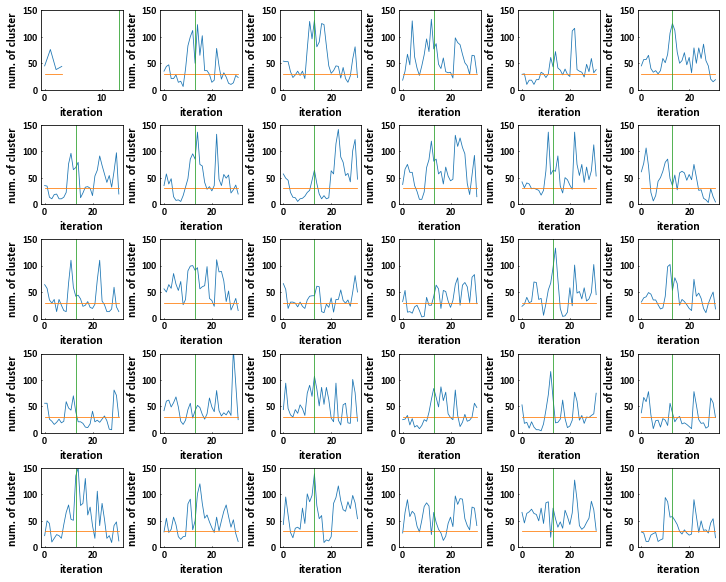

In [13]:
num_walkers=30
fig = plt.figure(figsize=(10,8))
for en in range(num_walkers):
    allcl=np.loadtxt('/home/dongdong/SCR/trpcage.run05/cluster/w%d_clu.dat' %en)
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    sub.plot(range(len(allcl)),allcl,lw=0.8)
    sub.plot(range(len(allcl)),[30]*len(allcl),lw=0.8)
    sub.plot([13]*2,[0,150],lw=0.8)
    sub.set_ylabel(r'num. of cluster',fontproperties=font_prop)
    sub.set_xlabel(r'iteration',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    plt.ylim(0,150)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

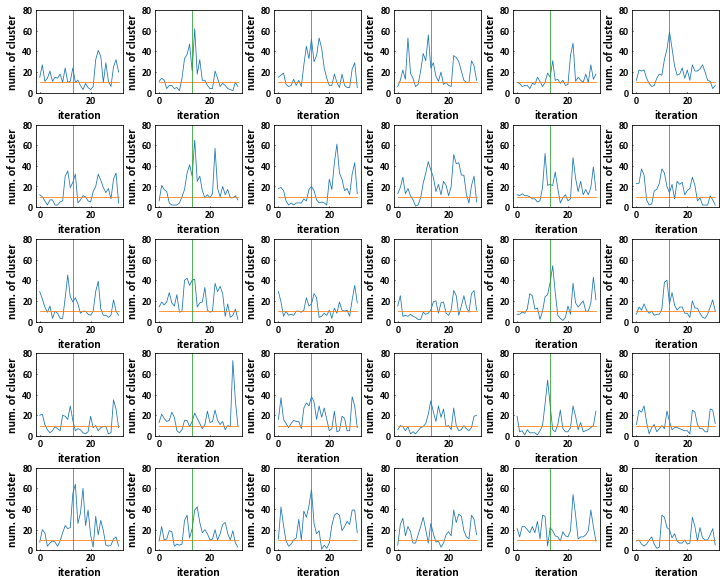

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=12)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
num_walkers=30
fig = plt.figure(figsize=(10,8))
for en in range(num_walkers):
    allcl=np.loadtxt('/home/dongdong/SCR/trpcage.run05/w%d_clu3.dat' %en)
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    sub.plot(range(len(allcl)),allcl,lw=0.8)
    sub.plot(range(len(allcl)),[10]*len(allcl),lw=0.8)
    sub.plot([13]*2,[0,150],lw=0.8)
    sub.set_ylabel(r'num. of cluster',fontproperties=font_prop)
    sub.set_xlabel(r'iteration',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    plt.ylim(0,80)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

In [121]:
num_walkers=30
for en in range(num_walkers):
    allcl=np.loadtxt('/home/dongdong/SCR/trpcage.run05/w%d_clu.dat' %en)
    if np.sum(allcl)<60:
        print(allcl)
        print(en)

[30. 16.  8.]
6
[10. 13. 24.]
22
[16. 12.  5.]
23
[12. 20.  5.]
26


In [118]:
for wa in range(30):
    for it in range(21,22):
        
        os.chdir('/home/dongdong/SCR/trpcage.run05/iter.%06d/00.enhcMD/%03d/' %(it,wa))
        os.system('python3 test.std.py -m *.pb -t 7.500000 -d angle.rad.out --output sel.out --output-angle sel.angle.out 1> sel.log 2> sel.log')



In [172]:
a=0
np.savetxt('test.dat', [a] , fmt = '%.6f')

In [174]:
aa=np.loadtxt('test.dat')

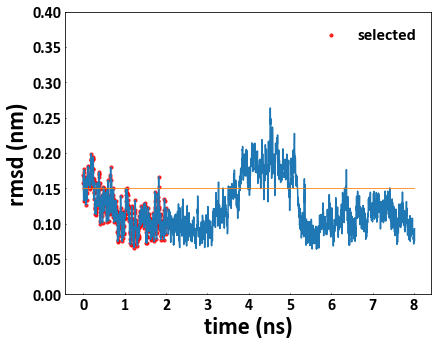

In [90]:
fig = plt.figure(figsize=(6,4.7))
num_walkers=1
for en in range(23,24):
    allrmsd=[]
    for it in range(24,28):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.chdir(dirname)
        filename='rmsd.xvg'
        os.system("sed -i 's/^@/#/g' %s " %filename)
        rmsd=np.loadtxt(filename)[:,1]
        index_data=np.loadtxt('sel.out')
        os.chdir('/home/dongdong/SCR/trpcage.run05')
        allrmsd.extend(list(rmsd))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    #sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    sub = fig.add_subplot(1,1,1)
    sub.plot(np.array(range(len(allrmsd)))/1000.0*4,allrmsd)
    index_data=index_data.astype(int)
    seldata=[ allrmsd[i] for i in index_data ]
    selindex=[ (np.array(range(len(allrmsd)))/1000.0*4)[i] for i in index_data ]

    sub.set_ylabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    sub.plot(np.array(range(len(allrmsd)))/1000.0*4,[0.15]*len(allrmsd),lw=0.8)
    sub.scatter(selindex,seldata,color='r',s=10,alpha=0.8,label='selected')
    sub.tick_params(direction="in", length=1)
    plt.ylim(0,0.4)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    leg.get_frame().set_linewidth(0.0)
    leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

3


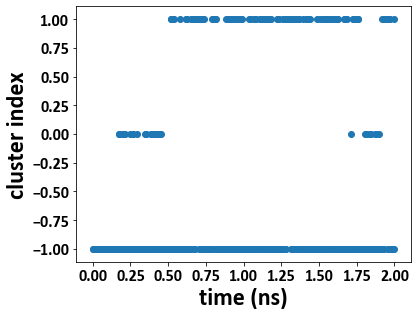

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import hdbscan
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
it=21
en=23
data=np.loadtxt('/home/dongdong/SCR/trpcage.run05/iter.%06d/00.enhcMD/%03d/plm.out' %(it,en))
newdata=np.hstack((np.sin(data[:,1:]),np.cos(data[:,1:])))
clusterer = hdbscan.HDBSCAN(min_cluster_size=30,min_samples=5)
clusterer.fit(newdata)
print(len(set(clusterer.labels_)))
#print(cls_sel)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.scatter(np.array(range(len(clusterer.labels_)))/1000*4,clusterer.labels_)
ax.set_ylabel(r'cluster index',fontproperties=font_prop)
ax.set_xlabel(r'time (ns)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.show()

4


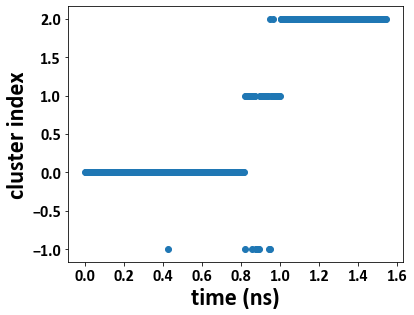

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import hdbscan
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
it=12
en=23
data=np.loadtxt('/home/dongdong/SCR/trpcage.run05/iter.%06d/00.enhcMD/%03d/sel.angle.out' %(it,en))
newdata=np.hstack((np.sin(data),np.cos(data)))
clusterer = hdbscan.HDBSCAN(min_cluster_size=15,min_samples=1)
clusterer.fit(newdata)
print(len(set(clusterer.labels_)))
#print(cls_sel)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.scatter(np.array(range(len(clusterer.labels_)))/1000*4,clusterer.labels_)
ax.set_ylabel(r'cluster index',fontproperties=font_prop)
ax.set_xlabel(r'time (ns)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.show()

3


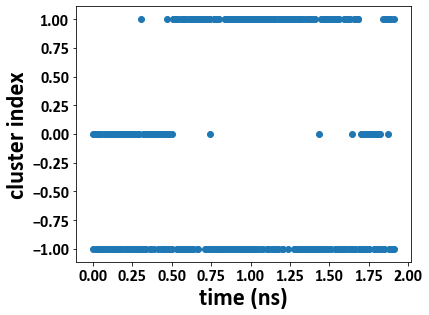

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import hdbscan
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
it=21
en=23
data=np.loadtxt('/home/dongdong/SCR/trpcage.run05/iter.%06d/00.enhcMD/%03d/sel.angle.out' %(it,en))
newdata=np.hstack((np.sin(data),np.cos(data)))
clusterer = hdbscan.HDBSCAN(min_cluster_size=15,min_samples=1)
clusterer.fit(newdata)
print(len(set(clusterer.labels_)))
#print(cls_sel)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.scatter(np.array(range(len(clusterer.labels_)))/1000*4,clusterer.labels_)
ax.set_ylabel(r'cluster index',fontproperties=font_prop)
ax.set_xlabel(r'time (ns)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.show()

3


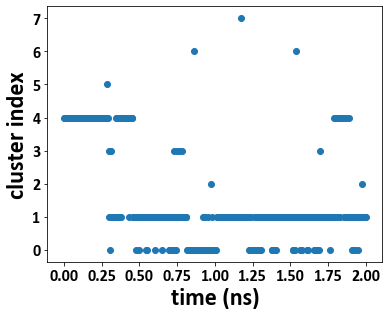

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import hdbscan
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
it=21
en=23
data=np.loadtxt('/home/dongdong/SCR/trpcage.run05/iter.%06d/00.enhcMD/%03d/plm.out' %(it,en))
dist=mk_dist(data[:,1:])
cls_sel = mk_cluster (dist, 2.5)
print(len(set(clusterer.labels_)))
#print(cls_sel)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.scatter(np.array(range(len(cls_sel)))*4/1000.0,cls_sel)
ax.set_ylabel(r'cluster index',fontproperties=font_prop)
ax.set_xlabel(r'time (ns)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.show()

3


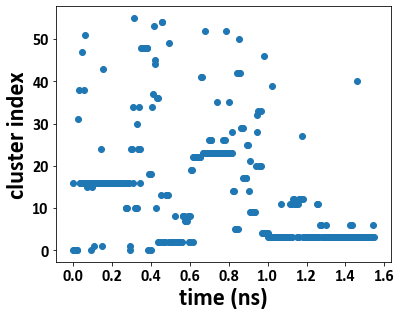

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import hdbscan
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
it=12
en=23
data=np.loadtxt('/home/dongdong/SCR/trpcage.run05/iter.%06d/00.enhcMD/%03d/sel.angle.out' %(it,en))
dist=mk_dist(data)
cls_sel = mk_cluster (dist, 2.5)
print(len(set(clusterer.labels_)))
#print(cls_sel)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.scatter(np.array(range(len(cls_sel)))*4/1000.0,cls_sel)
ax.set_ylabel(r'cluster index',fontproperties=font_prop)
ax.set_xlabel(r'time (ns)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.show()

3


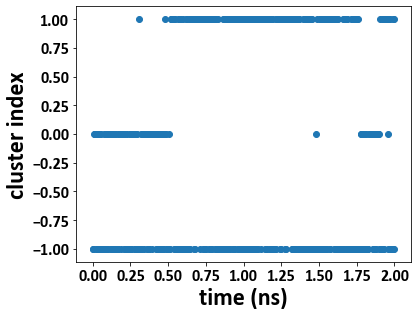

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import hdbscan
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
it=21
en=23
data=np.loadtxt('/home/dongdong/SCR/trpcage.run05/iter.%06d/00.enhcMD/%03d/plm.out' %(it,en))
newdata=np.hstack((np.sin(data[:,1:]),np.cos(data[:,1:])))
clusterer = hdbscan.HDBSCAN(min_cluster_size=15,min_samples=1)
clusterer.fit(newdata)
print(len(set(clusterer.labels_)))
#print(cls_sel)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.scatter(np.array(range(len(clusterer.labels_)))/1000*4,clusterer.labels_)
ax.set_ylabel(r'cluster index',fontproperties=font_prop)
ax.set_xlabel(r'time (ns)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.show()

In [12]:
import os
import pathlib
for it in range(19,28):
    for en in range(16):
        trjdir='/scratch/gpfs/linfengz/research/rid/trpcage.run.run.00.dongdong.scheme/iter.%06d/00.enhcMD/%03d/' %(it,en)
        outdir='/home/dongdong/SCR/trpcage.run.run.00.dongdong.scheme/iter.%06d/00.enhcMD/%03d/' %(it,en)
        pathlib.Path(outdir).mkdir(parents=True, exist_ok=True)
        trjname=trjdir+'traj_comp.xtc'
        outtrj=outdir+'md_nopbc.xtc'
        outrmsd=outdir+'rmsd.xvg'
        os.system('echo -e "1\n" | gmx trjconv -s /home/dongdong/SCR/trpcage.run05/topol.tpr -f %s -o %s -pbc mol -ur compact' %(trjname, outtrj))
        os.system('echo -e "3\n3\n" | gmx rms -s /home/dongdong/SCR/trpcage.run05/conf_nosol.gro -f %s -o %s' %(outtrj, outrmsd))

FileNotFoundError: [Errno 2] No such file or directory: 'rmsd.xvg'

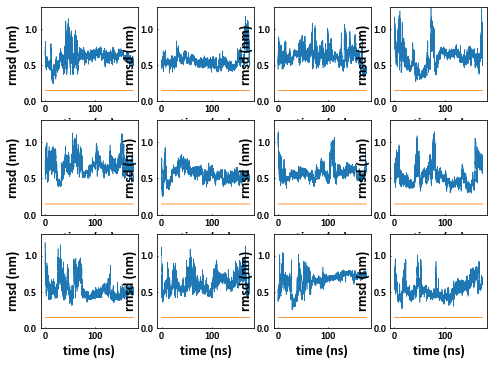

In [33]:
fig = plt.figure(figsize=(8,8))

num_walkers=16
for en in range(num_walkers):
    allrmsd=[]
    for it in range(88):
        dirname='/home/dongdong/SCR/trpcage.run.run.00.dongdong.scheme/iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.chdir(dirname)
        #print(dirname)
        filename='rmsd.xvg'
        os.system("sed -i 's/^@/#/g' %s " %filename)
        rmsd=np.loadtxt(filename)[:,1]
        os.chdir('/home/dongdong/SCR/trpcage.run.run.00.dongdong.scheme')
        allrmsd.extend(list(rmsd))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(len(allrmsd))
    sub = fig.add_subplot(int(num_walkers)/4,4,en+1)
    sub.plot(np.array(range(len(allrmsd)))/1000.0*4,allrmsd,lw=0.6)
    sub.set_ylabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    sub.plot(np.array(range(len(allrmsd)))/1000.0*4,[0.15]*len(allrmsd),lw=0.8)
    sub.tick_params(direction="in", length=1)
    plt.ylim(0,1.3)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

In [42]:
aa[nn]

array([1, 3])